# Unit 5 - Financial Planning

In [12]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
# Load .env enviroment variables
load_dotenv("C:\\Users\\GamerTech\\Downloads\\Starter_Code (13)\\Instructions\\Starter_Code\\example.env.txt")

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Creating Alpaca API Object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [15]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [17]:
# Fetch current BTC price
btc_data=requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD") # New variable to contain BTC link and using the request command to retrive the link
data1=btc_data.json() # Reads the data in a JSON format
btc_price=data1["data"]["1"]["quotes"]["CAD"]["price"] # Specifying where im grabbing BTC price

# Fetch current ETH price
eth_data=requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD") # New variable to contain ETH link and using the request command to retrive the link
data2=eth_data.json() # Reads the data in a JSON format
eth_price=data2["data"]["1027"]["quotes"]["CAD"]["price"] # Specifying where im grabbing ETH price


# Compute current value of my crpto
total_btc_price= my_btc*btc_price # Current Price of BTC * Number of BTC Shares
total_eth_price=my_eth*eth_price # Current Price of ETH * Number of ETH Shares

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${total_btc_price:0.2f}") # Display Current Value of BTC Balance
print(f"The current value of your {my_eth} ETH is ${total_eth_price:0.2f}") # Display Current Value of ETH Balance

The current value of your 1.2 BTC is $79123.39
The current value of your 5.3 ETH is $18087.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [18]:
# Set current amount of shares
my_agg = 200
my_spy = 50
shares_data = {
    "shares": [my_agg, my_spy]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [19]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2')

In [45]:
# Format current date as ISO format
today = pd.Timestamp("2023-09-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_portfolio[stock_portfolio['symbol']=='SPY'].drop('symbol', axis=1) # Seperating SPY Ticker
AGG = stock_portfolio[stock_portfolio['symbol']=='AGG'].drop('symbol', axis=1) # Seperating AGG Ticker

# Concatenate the ticker DataFrames
stock_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG']) 

# Preview DataFrame
stock_portfolio

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-09-25 04:00:00+00:00  432.23  432.27  428.72      488035  429.17   

                                                  AGG                   \
                             volume        vwap close     high     low   
timestamp                                                                
2023-09-25 04:00:00+00:00  70874824  430.900652  94.3  94.6175  94.285   

                                                                  
                          trade_count   open   volume       vwap  
timestamp                                                         
2023-09-25 04:00:00+00:00       25129  94.49  7485203  94.415122

In [46]:
# Pick AGG and SPY close prices
spy_price_close = float(stock_portfolio["SPY"]["close"]) # Display SPY Closing Price
agg_price_close = float(stock_portfolio["AGG"]["close"]) # Display AGG Closing Price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price_close}")  # Print SPY close prices
print(f"Current SPY closing price: ${spy_price_close}") # Print AGG  close prices

Current AGG closing price: $94.3
Current SPY closing price: $432.23


In [47]:
# Compute the current value of shares
spy_value = spy_price_close * my_spy # Closing Price of SPY * Shares of SPY
agg_value = agg_price_close * my_agg # Closing Price of AGG * Shares of AGG    

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}") # Print Current Value of close prices
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}") # Print SPY close prices

The current value of your 50 SPY shares is $21611.50
The current value of your 200 AGG shares is $18860.00


In [48]:
# calculate the total value of shares
total_value_shares = my_agg_value+my_spy_value

# Display answer
print(f"${total_value_shares}")

$40614.5


### Savings Health Analysis

In [49]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
total_crypto= total_btc_price + total_eth_price  # Total price of BTC + Total price of ETH 
total_shares= my_spy_value + my_agg_value  # Total Shares of SPY + Total Shares of AGG


# Create savings DataFrame
savings_data = {
    "Amount": [total_crypto, total_shares] # Name of Columns
}

tickers = ["Crypto", "Shares"] # Name of Tickers

total_savings_data = pd.DataFrame(savings_data, index=tickers) # Dataframe Creation

# Display savings DataFrame
total_savings_data

,Amount
Crypto,97210.920807
Shares,40614.500000


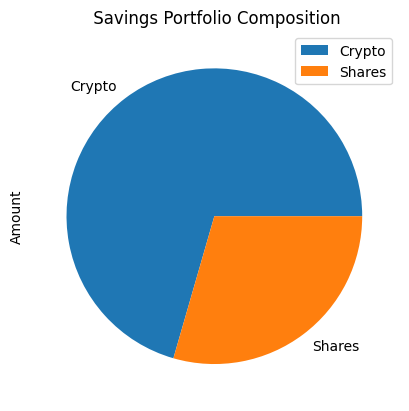

In [50]:
# Plot savings pie chart
total_savings_data.plot.pie(y="Amount", title=" Savings Portfolio Composition");

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_saving = total_shares + total_crypto # New variable to add total shares of Crypto and Stocks
print("Emergency Fund:", emergency_fund) # Prints Emergency Fund
print("Total Amount Saving:", total_amount_saving) # Prints Total Amount Saving

# Validate saving health with a If Loop
if emergency_fund < total_amount_saving: # Bigger than emergency fund
    print("Congratulations! You have more savings than your emergency fund!") # Print Statement

if emergency_fund == total_amount_saving: # Equal to emergency fund
    print("Congratulations! You have reached your goal of the emergency fund.") # Print Statement

if emergency_fund > total_amount_saving: # Less than emergency fund
    shortfall = emergency_fund - total_amount_saving #Determine the amount needed to reach goal
    print(f"You are below the emergency fund amount. You need to save an additional ${shortfall:.2f} to reach your goal.") # Print Statement

Emergency Fund: 36000
Total Amount Saving: 137825.420807
Congratulations! You have more savings than your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [52]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [53]:
#Initiliaze Alpaca Keys 
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api= tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


# Set Ticker Information
tickers = ["SPY", "AGG"]
# Get 5 years' worth of historical data for SPY and AGG
five_year_port = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = five_year_port[five_year_port['symbol']=='SPY'].drop('symbol', axis=1) # Seperating SPY Ticker
AGG = five_year_port[five_year_port['symbol']=='AGG'].drop('symbol', axis=1)# Seperating AGG Ticker


# Concatenate the ticker DataFrames
new_port_five_year = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG']) # New Dataframe to hold both Stocks

# Display sample data
new_port_five_year.head(1000) #Display Dataframe

SPY                                        \
                              close      high     low trade_count    open   
timestamp                                                                   
2016-05-02 04:00:00+00:00  207.9700  208.1800  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.8000  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.8500  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.9800  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.7700  203.88      340162  204.06   
...                             ...       ...     ...         ...     ...   
2020-04-15 04:00:00+00:00  277.7500  283.9407  275.46      711142  277.57   
2020-04-16 04:00:00+00:00  278.9600  280.0300  275.76      748803  279.15   
2020-04-17 04:00:00+00:00  286.5400  287.3000  282.40      698621  285.38   
2020-04-20 04:00:00+00:00  281.7600  286.7912  281.35      600461  282.61   
2020-04-21 04:00:00+00:00  273.1700  278.0400  272.02      923553  276.73   

                                                      AGG                      \
                              volume        vwap    close      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00   64747229  207.305695  110.605  110.7400  110.5200   
2016-05-03 04:00:00+00:00  108050343  206.309997  110.810  110.9450  110.7500   
2016-05-04 04:00:00+00:00   94995641  205.086315  110.860  110.9315  110.7595   
2016-05-05 04:00:00+00:00   68425268  205.140615  111.140  111.1600  110.8010   
2016-05-06 04:00:00+00:00   90999800  204.943796  110.970  111.1200  110.9700   
...                              ...         ...      ...       ...       ...   
2020-04-15 04:00:00+00:00  122479542  277.825663  117.240  117.3050  116.7100   
2020-04-16 04:00:00+00:00  133521580  278.842847  117.390  117.5250  117.1900   
2020-04-17 04:00:00+00:00  148426671  284.335372  117.250  117.6200  117.0350   
2020-04-20 04:00:00+00:00  101355962  283.704924  117.080  117.2800  116.9400   
2020-04-21 04:00:00+00:00  127506242  274.740249  117.140  117.4400  117.0700   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00       15122  110.74  3608552  110.626939  
2016-05-03 04:00:00+00:00       15663  110.89  3128774  110.864495  
2016-05-04 04:00:00+00:00       13984  110.91  3096337  110.877983  
2016-05-05 04:00:00+00:00       15708  110.92  3052967  111.030002  
2016-05-06 04:00:00+00:00       12697  111.12  2922700  111.027631  
...                               ...     ...      ...         ...  
2020-04-15 04:00:00+00:00       19621  117.03  4550090  117.148732  
2020-04-16 04:00:00+00:00       16907  117.19  4968628  117.399250  
2020-04-17 04:00:00+00:00       25621  117.52  5131360  117.354514  
2020-04-20 04:00:00+00:00       18509  117.15  3914821  117.031768  
2020-04-21 04:00:00+00:00       19426  117.43  4819581  117.165879  

[1000 rows x 14 columns]

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = new_port_five_year,#Specifying where to pull data
    weights = [.60,.40],#Weight of the stock
    num_simulation = 500,# Number of times the simulation is running
    num_trading_days = 252*30 # specifiying the years
)

In [55]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head(1000)

SPY                                        \
                              close      high     low trade_count    open   
timestamp                                                                   
2016-05-02 04:00:00+00:00  207.9700  208.1800  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.8000  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.8500  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.9800  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.7700  203.88      340162  204.06   
...                             ...       ...     ...         ...     ...   
2020-04-15 04:00:00+00:00  277.7500  283.9407  275.46      711142  277.57   
2020-04-16 04:00:00+00:00  278.9600  280.0300  275.76      748803  279.15   
2020-04-17 04:00:00+00:00  286.5400  287.3000  282.40      698621  285.38   
2020-04-20 04:00:00+00:00  281.7600  286.7912  281.35      600461  282.61   
2020-04-21 04:00:00+00:00  273.1700  278.0400  272.02      923553  276.73   

                                                                   AGG  \
                              volume        vwap daily_return    close   
timestamp                                                                
2016-05-02 04:00:00+00:00   64747229  207.305695          NaN  110.605   
2016-05-03 04:00:00+00:00  108050343  206.309997    -0.008707  110.810   
2016-05-04 04:00:00+00:00   94995641  205.086315    -0.005574  110.860   
2016-05-05 04:00:00+00:00   68425268  205.140615    -0.000195  111.140   
2016-05-06 04:00:00+00:00   90999800  204.943796     0.003659  110.970   
...                              ...         ...          ...      ...   
2020-04-15 04:00:00+00:00  122479542  277.825663    -0.021318  117.240   
2020-04-16 04:00:00+00:00  133521580  278.842847     0.004356  117.390   
2020-04-17 04:00:00+00:00  148426671  284.335372     0.027172  117.250   
2020-04-20 04:00:00+00:00  101355962  283.704924    -0.016682  117.080   
2020-04-21 04:00:00+00:00  127506242  274.740249    -0.030487  117.140   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200       15122  110.74  3608552   
2016-05-03 04:00:00+00:00  110.9450  110.7500       15663  110.89  3128774   
2016-05-04 04:00:00+00:00  110.9315  110.7595       13984  110.91  3096337   
2016-05-05 04:00:00+00:00  111.1600  110.8010       15708  110.92  3052967   
2016-05-06 04:00:00+00:00  111.1200  110.9700       12697  111.12  2922700   
...                             ...       ...         ...     ...      ...   
2020-04-15 04:00:00+00:00  117.3050  116.7100       19621  117.03  4550090   
2020-04-16 04:00:00+00:00  117.5250  117.1900       16907  117.19  4968628   
2020-04-17 04:00:00+00:00  117.6200  117.0350       25621  117.52  5131360   
2020-04-20 04:00:00+00:00  117.2800  116.9400       18509  117.15  3914821   
2020-04-21 04:00:00+00:00  117.4400  117.0700       19426  117.43  4819581   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.626939          NaN  
2016-05-03 04:00:00+00:00  110.864495     0.001853  
2016-05-04 04:00:00+00:00  110.877983     0.000451  
2016-05-05 04:00:00+00:00  111.030002     0.002526  
2016-05-06 04:00:00+00:00  111.027631    -0.001530  
...                               ...          ...  
2020-04-15 04:00:00+00:00  117.148732     0.004111  
2020-04-16 04:00:00+00:00  117.399250     0.001279  
2020-04-17 04:00:00+00:00  117.354514    -0.001193  
2020-04-20 04:00:00+00:00  117.031768    -0.001450  
2020-04-21 04:00:00+00:00  117.165879     0.000512  

[1000 rows x 16 columns]

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993297,1.010786,0.999151,1.005785,1.008894,1.012434,1.021546,0.995837,0.993899,1.005619,...,0.987840,0.998086,1.002580,1.000609,0.991893,1.003641,1.000841,1.012777,1.009988,0.997004
2,0.997330,1.020053,1.008583,1.015244,1.013358,1.012943,1.036963,1.002431,0.986097,1.014383,...,0.982046,1.005225,1.001843,0.992798,1.005244,0.990662,1.008230,1.013446,1.009760,0.986792
3,0.997640,1.015064,1.015189,1.018278,1.010604,1.009707,1.042112,0.992049,0.976191,1.007968,...,0.981893,0.996604,0.997684,0.991081,0.995712,0.997453,1.006733,1.010689,1.009466,0.993904
4,0.994468,1.021193,1.019261,1.004059,1.019317,1.003767,1.042613,0.977714,0.977204,0.998318,...,0.971564,0.991372,0.992956,0.994520,0.997667,0.998954,1.010534,1.019784,1.003475,0.975135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.975501,16.300350,16.269117,7.600880,8.245255,19.177408,9.833946,13.705119,17.661590,35.278737,...,8.343312,7.063945,14.331554,8.984643,20.222607,12.520152,12.051067,14.364987,8.684791,37.468068
7557,16.762783,16.037061,16.202878,7.620309,8.202053,19.463010,9.824975,13.722015,17.619736,35.141495,...,8.315423,7.061655,14.223740,9.135550,19.971142,12.623965,12.050033,14.318965,8.755254,38.093142
7558,16.822450,16.193470,16.276858,7.626338,8.134550,19.219696,9.823770,13.687440,17.527151,34.897412,...,8.378682,7.085255,14.197017,9.102221,19.808389,12.598425,12.118488,14.146315,8.866779,37.919809
7559,16.786155,16.275760,16.213700,7.579655,8.202843,19.266557,9.861796,13.862376,17.524129,34.900663,...,8.395136,7.033726,14.150882,9.152154,19.816475,12.384928,12.350425,14.311303,8.904724,38.110082


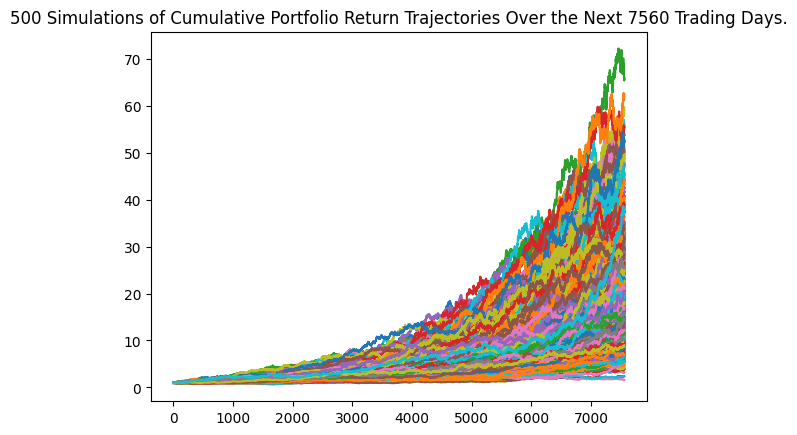

In [57]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

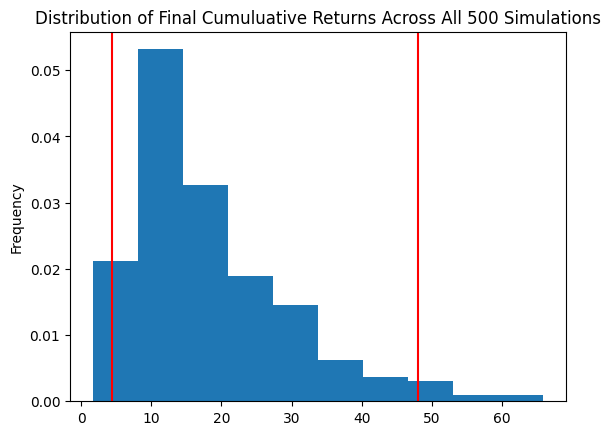

In [60]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [80]:
def summarize_cumulative_return(MC_thirty_year):
    # Example setup: Assuming MC_thirty_year.simulated_return is your DataFrame of simulated returns
    # First, calculate the descriptive statistics for the last row (cumulative returns at the end of the period)
    metrics = MC_thirty_year.simulated_return.iloc[-1].describe()
    
    # Calculate the 95% confidence intervals
    ci_lower = MC_thirty_year.simulated_return.iloc[-1].quantile(0.025)
    ci_upper = MC_thirty_year.simulated_return.iloc[-1].quantile(0.975)
    ci_series = pd.Series([ci_lower, ci_upper], index=["95% CI Lower", "95% CI Upper"])
    
    # Combine the descriptive statistics with the confidence intervals
    combined_stats = pd.concat([metrics, ci_series])
    
    return combined_stats

# Assuming MC_thirty_year is an instance of your Monte Carlo simulation class with a simulated_return DataFrame
# Call the function and print the results
tbl = summarize_cumulative_return(MC_thirty_year)
print(tbl)


count           500.000000
mean             18.282035
std              11.326633
min               1.609632
25%               9.790617
50%              15.165574
75%              24.269822
max              65.941959
95% CI Lower      4.345317
95% CI Upper     48.025316
dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [81]:
#Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2) # Multiplies ci_lower by 20,000 and rounds it to 2 decimals points after
ci_upper = round(tbl[9]*20000,2)# Multiplies ci_upper by 20,000 and rounds it to 2 decimals points after

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86906.35 and $960506.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [82]:
# Set initial investment
initial_investment2 = 20000 *1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2) # Multiplies ci_lower by 30,000 and rounds it to 2 decimals points after
ci_upper = round(tbl[9]*30000,2)# Multiplies ci_upper by 30,000 and rounds it to 2 decimals points after


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130359.52 and $1440759.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = new_port_five_year, #Specifying where to pull data
    weights = [.60,.40],#Weight of the stock
    num_simulation = 500, #Number of times the simulation is running
    num_trading_days = 252*5 # specifiying the years
)

In [84]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988816,0.993166,0.992255,1.005624,1.013389,1.006310,0.994325,0.988743,1.003100,1.004073,...,0.979731,0.990272,0.997146,0.997692,1.009408,0.990446,1.008371,0.994288,0.992945,1.015605
2,0.994938,0.991283,1.005282,1.000220,1.012000,1.002708,0.999710,0.984797,1.007104,1.017850,...,0.976154,0.990536,0.989673,0.996897,1.018128,0.992893,1.008746,0.990008,0.995385,1.013475
3,0.996288,0.988902,1.011294,0.996766,1.009030,0.995428,0.990857,0.990158,1.007393,1.020061,...,0.982571,0.985485,0.990315,0.999843,1.025159,0.982724,1.014759,0.990203,1.010366,1.015361
4,0.996890,1.001072,1.015282,0.995758,1.002397,0.995823,0.991792,0.991654,1.014987,1.038097,...,0.981011,0.988667,0.994205,0.997778,1.025446,0.996783,1.014160,0.998650,1.020135,1.014949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.557446,1.615788,1.229222,1.207867,1.858732,1.710743,1.269599,1.743470,1.426675,1.719692,...,1.863553,2.168529,2.057023,1.275555,2.097731,1.604026,1.345923,1.788034,2.450571,1.557831
1257,1.537764,1.638142,1.213535,1.209135,1.860212,1.716283,1.263065,1.769124,1.440221,1.718432,...,1.842561,2.182930,2.061329,1.282065,2.103205,1.606128,1.357933,1.770765,2.442978,1.576306
1258,1.528929,1.647902,1.223787,1.208025,1.861935,1.708932,1.249719,1.785213,1.446888,1.738582,...,1.848640,2.171466,2.059719,1.289731,2.106643,1.619413,1.357996,1.766369,2.446431,1.572040
1259,1.533015,1.636837,1.219202,1.195380,1.836454,1.697565,1.259035,1.769551,1.437322,1.713385,...,1.868782,2.160518,2.072302,1.285122,2.107589,1.628793,1.352146,1.768879,2.427366,1.589179


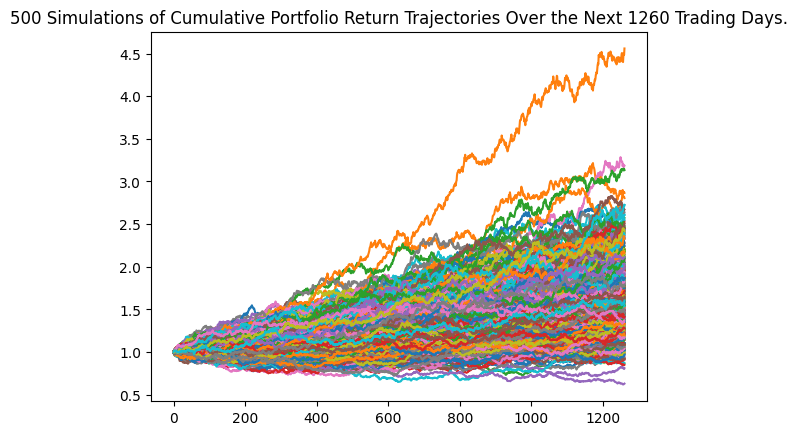

In [85]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

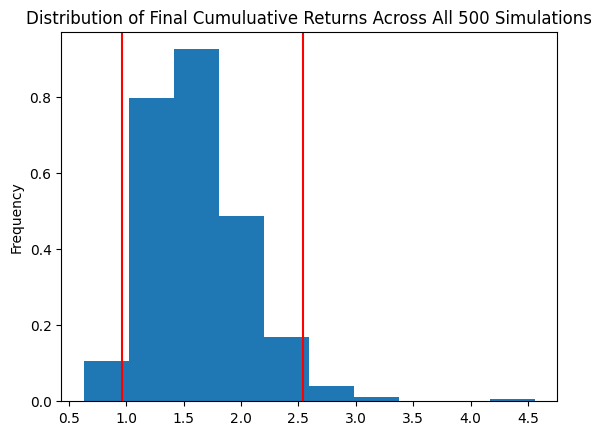

In [86]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [88]:
def summarize_cumulative_return(MC_simulation):
    # Assuming MC_simulation.simulated_return is your DataFrame of simulated returns
    
    # Calculate the descriptive statistics for the last row (cumulative returns at the end of the period)
    metrics = MC_simulation.simulated_return.iloc[-1].describe()
    
    # Assuming self.confidence_interval is a method that returns a Series with the 95% CI Lower and Upper values
    ci_lower = MC_simulation.simulated_return.iloc[-1].quantile(0.025)
    ci_upper = MC_simulation.simulated_return.iloc[-1].quantile(0.975)
    ci_series = pd.Series([ci_lower, ci_upper], index=["95% CI Lower", "95% CI Upper"])
    
    # Combine the descriptive statistics with the confidence intervals
    combined_stats = pd.concat([metrics, ci_series])
    
    return combined_stats

# For MC_five_year simulation
tbl1 = summarize_cumulative_return(MC_five_year)
print(tbl1)


count           500.000000
mean              1.622060
std               0.428846
min               0.630401
25%               1.327900
50%               1.556678
75%               1.844283
max               4.559540
95% CI Lower      0.966959
95% CI Upper      2.542562
dtype: float64


In [89]:
# Set initial investment
initial_investment3=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl1[8]*60000,2) # Multiplies ci_lower by 60,000 and rounds it to 2 decimals points after
ci_upper_five = round(tbl1[9]*60000,2)# Multiplies ci_upper by 60,000 and rounds it to 2 decimals points after

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58017.55 and $152553.72


### Ten Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = new_port_five_year, #Specifying where to pull data
    weights = [.60,.40], #Weight of the stock
    num_simulation = 500,#Number of times the simulation is running
    num_trading_days = 252*10 #Specifiying the years
)

In [91]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006061,1.000852,1.006735,1.005069,1.005292,0.994339,0.985692,1.006540,0.994041,0.993640,...,0.996248,1.005521,0.989383,0.997752,0.999511,1.012702,1.006992,0.987492,1.012772,1.007167
2,1.005096,0.985837,1.009940,1.005206,1.013377,0.997024,0.996188,1.014390,0.997567,0.991216,...,0.982383,0.994063,0.989370,1.002746,1.007800,1.016484,1.020848,0.988687,1.012629,1.004275
3,1.001631,0.981526,1.014274,1.018217,1.006377,0.998130,0.991326,1.017571,1.004355,0.987835,...,0.981663,0.985651,0.989241,0.999221,1.004934,1.015396,1.021503,0.993735,1.011386,1.003562
4,1.006576,0.973561,1.020097,1.023281,0.985463,1.000118,0.986855,1.020942,0.997165,0.996318,...,0.971611,0.981976,0.992806,0.997303,1.001718,1.017071,1.028075,0.992141,1.009733,1.008395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.009251,4.033704,2.654112,3.090468,3.130047,2.569323,2.222125,2.481145,2.690313,7.443633,...,1.371450,1.963202,1.691958,2.413802,1.508367,2.406291,1.666766,2.131525,1.103147,2.175067
2517,1.998559,3.970498,2.672343,3.093068,3.160615,2.571105,2.257461,2.472725,2.630196,7.395011,...,1.361146,1.966504,1.681681,2.398475,1.506748,2.421931,1.654622,2.147639,1.105676,2.194662
2518,1.975311,3.999679,2.680861,3.113410,3.188273,2.565462,2.266621,2.444565,2.618713,7.366745,...,1.370562,1.956520,1.696731,2.394746,1.496100,2.428197,1.635648,2.137950,1.094350,2.193826
2519,1.977724,3.977446,2.661875,3.094570,3.189291,2.601218,2.279638,2.435879,2.628894,7.329594,...,1.369752,1.951097,1.695120,2.404778,1.494983,2.413793,1.656561,2.127628,1.098048,2.194348


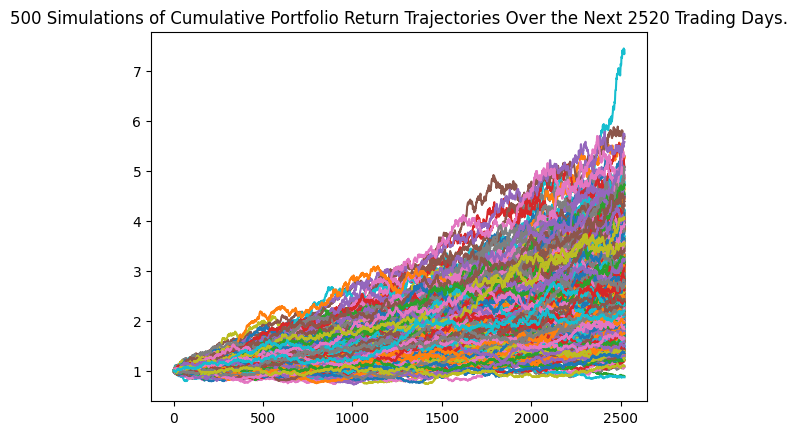

In [92]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

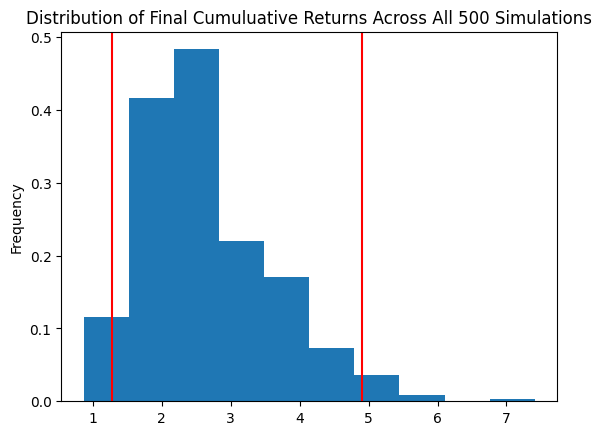

In [93]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [104]:
import pandas as pd

# Define a function to summarize cumulative returns, including confidence intervals
def summarize_cumulative_return_fixed(MC_simulation):
    # Calculate the descriptive statistics for the last row of simulated returns
    metrics = MC_simulation.simulated_return.iloc[-1].describe()
    
    # Calculate the 95% confidence intervals
    ci_lower = MC_simulation.simulated_return.iloc[-1].quantile(0.025)
    ci_upper = MC_simulation.simulated_return.iloc[-1].quantile(0.975)
    ci_series = pd.Series([ci_lower, ci_upper], index=["95% CI Lower", "95% CI Upper"])
    
    # Combine the descriptive statistics with the confidence intervals
    combined_stats = pd.concat([metrics, ci_series])
    
    return combined_stats

# Assuming MC_ten_year is an instance of your Monte Carlo simulation class
# and it has the necessary attributes and methods as per your initial setup
tbl3 = summarize_cumulative_return_fixed(MC_ten_year)
print(tbl3)

count           500.000000
mean              2.649099
std               0.954122
min               0.868812
25%               1.958753
50%               2.462926
75%               3.142300
max               7.409860
95% CI Lower      1.274484
95% CI Upper      4.898204
dtype: float64


In [105]:
# Set initial investment
initial_investment3=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl3[8]*60000,2) # Multiplies ci_lower by 60,000 and rounds it to 2 decimals points after
ci_upper_ten = round(tbl3[9]*60000,2)# Multiplies ci_upper by 60,000 and rounds it to 2 decimals points after

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $76469.03 and $293892.24
